# Breast Cancer Wisconsin (Diagnostic)

In [1]:
# Import necessary libraries

# General Libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation

# Sklearn Model Selection
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.model_selection import cross_val_score  # For cross-validation

# Sklearn Preprocessing
from sklearn.preprocessing import StandardScaler  # For standardizing numerical features
from sklearn.preprocessing import OneHotEncoder  # For encoding categorical features
from sklearn.preprocessing import LabelEncoder  # For encoding target variable

# Sklearn Imputation
from sklearn.impute import SimpleImputer  # For handling missing values

# Sklearn Feature Selection
from sklearn.feature_selection import SelectKBest, chi2  # For feature selection

# Sklearn Pipeline
from sklearn.compose import ColumnTransformer  # For combining preprocessing steps
from sklearn.pipeline import Pipeline  # For creating a sequential pipeline

# Sklearn Models
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.naive_bayes import GaussianNB  # Naive Bayes


# Sklearn Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluating models

# Visualization
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualization



In [2]:
data=pd.read_csv(r"C:\Users\Habibur Rahaman\Downloads\data.csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# 1. Exploratory Data Analysis (EDA)

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# Drop unnecessary columns
# Dropping 'id' as it is just an identifier
# Dropping 'Unnamed: 32' as it appears to be an empty column or irrelevant

data = data.drop(['id', 'Unnamed: 32'], axis=1)

In [8]:
# Check for missing values
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# No Missing data is there

# Handling Missing Values (if any)
# SimpleImputer: Handles missing values by replacing them with a strategy ('mean', 'median', 'most_frequent', etc.)


In [9]:
# Assuming numerical columns do not contain categorical features

#numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
#imputer = SimpleImputer(strategy='mean')
#data[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Encoding the categorical 'diagnosis' feature
# 'diagnosis' is binary: 'M' (Malignant) and 'B' (Benign)
# LabelEncoder: Converts categorical labels into numeric form

In [10]:
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])  # 'M' -> 1, 'B' -> 0


In [11]:
# Define features (X) and target (y)

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [12]:
# Scaling Numerical Features
# StandardScaler: Standardizes numerical features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [14]:
from sklearn.feature_selection import f_classif

# Feature Selection (Optional)
# SelectKBest: Selects the top k features that have the highest scores
# f_classif: ANOVA F-value between feature and label
selector = SelectKBest(score_func=f_classif, k='all')  # 'all' keeps all features for scoring
X_new = selector.fit_transform(X, y)

In [15]:
# Print scores of features
print("\nFeature scores:")
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_}).sort_values(by='Score', ascending=False)
print(feature_scores)



Feature scores:
                    Feature       Score
27     concave points_worst  964.385393
22          perimeter_worst  897.944219
7       concave points_mean  861.676020
20             radius_worst  860.781707
2            perimeter_mean  697.235272
23               area_worst  661.600206
0               radius_mean  646.981021
3                 area_mean  573.060747
6            concavity_mean  533.793126
26          concavity_worst  436.691939
5          compactness_mean  313.233079
25        compactness_worst  304.341063
10                radius_se  268.840327
12             perimeter_se  253.897392
13                  area_se  243.651586
21            texture_worst  149.596905
24         smoothness_worst  122.472880
28           symmetry_worst  118.860232
1              texture_mean  118.096059
17        concave points_se  113.262760
4           smoothness_mean   83.651123
8             symmetry_mean   69.527444
29  fractal_dimension_worst   66.443961
15           compactnes

In [16]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:

# Models to Evaluate
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=0),
    'Support Vector Machine': SVC(random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0)
}

In [18]:
models

{'Random Forest': RandomForestClassifier(random_state=0),
 'Decision Tree': DecisionTreeClassifier(random_state=0),
 'Logistic Regression': LogisticRegression(max_iter=200, random_state=0),
 'Support Vector Machine': SVC(random_state=0),
 'K-Nearest Neighbors': KNeighborsClassifier(),
 'Naive Bayes': GaussianNB(),
 'Gradient Boosting': GradientBoostingClassifier(random_state=0)}

In [19]:
# Function to evaluate and plot feature importance for a model
def evaluate_model(model, model_name):
    # Creating a pipeline with preprocessing and model
    pipeline = Pipeline(steps=[('scaler', scaler),
                               ('model', model)])
    
    # Training the model
    pipeline.fit(X_train, y_train)

    # Making predictions
    y_pred = pipeline.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

    # Extract feature importances if available
    if hasattr(model, 'feature_importances_'):
        feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
        print(f"Feature Importances:\n{feature_importances}")

        plt.figure(figsize=(8, 6))
        sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
        plt.title(f'{model_name} Feature Importances')
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.xticks(rotation=45)
        plt.show()

    # Cross-validation scores
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean cross-validation score: {cv_scores.mean():.4f}")
    print('-' * 50)




Model: Random Forest
Accuracy: 0.9649
Confusion Matrix:
[[64  3]
 [ 1 46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.94      0.98      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Feature Importances:
                         Importance
perimeter_worst            0.172054
concave points_worst       0.142027
radius_worst               0.095563
concave points_mean        0.086691
concavity_mean             0.079866
perimeter_mean             0.060164
area_worst                 0.050653
area_se                    0.038800
area_mean                  0.037145
radius_mean                0.036996
concavity_worst            0.024432
radius_se                  0.024074
texture_worst              0.018593
compactness_worst          0.015655
texture_mean 

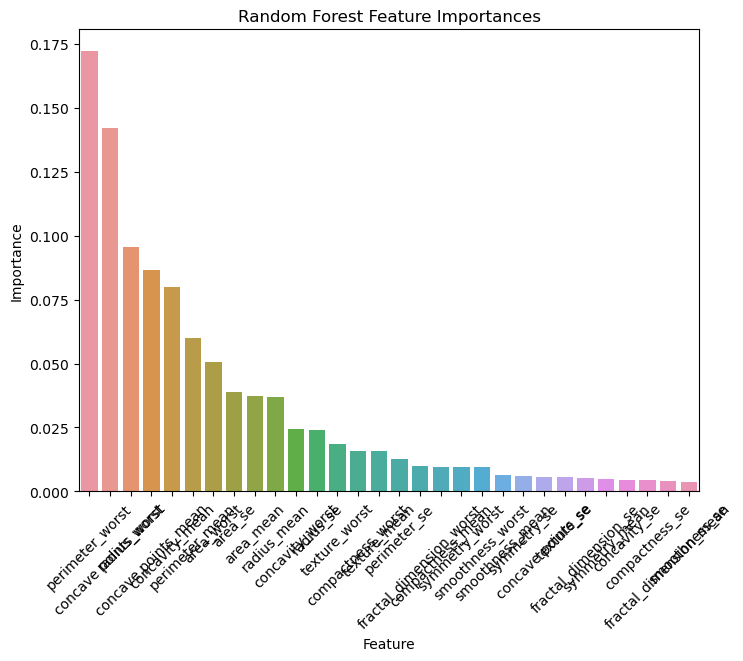

Cross-validation scores: [0.94505495 0.96703297 0.92307692 0.96703297 0.97802198]
Mean cross-validation score: 0.9560
--------------------------------------------------

Model: Decision Tree
Accuracy: 0.9123
Confusion Matrix:
[[60  7]
 [ 3 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        67
           1       0.86      0.94      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

Feature Importances:
                         Importance
concave points_worst       0.692835
area_worst                 0.135911
smoothness_mean            0.038941
perimeter_mean             0.022554
concave points_se          0.016482
symmetry_mean              0.016482
perimeter_worst            0.014906
area_se                    0.012158
texture_mean               0.009756
texture_worst           

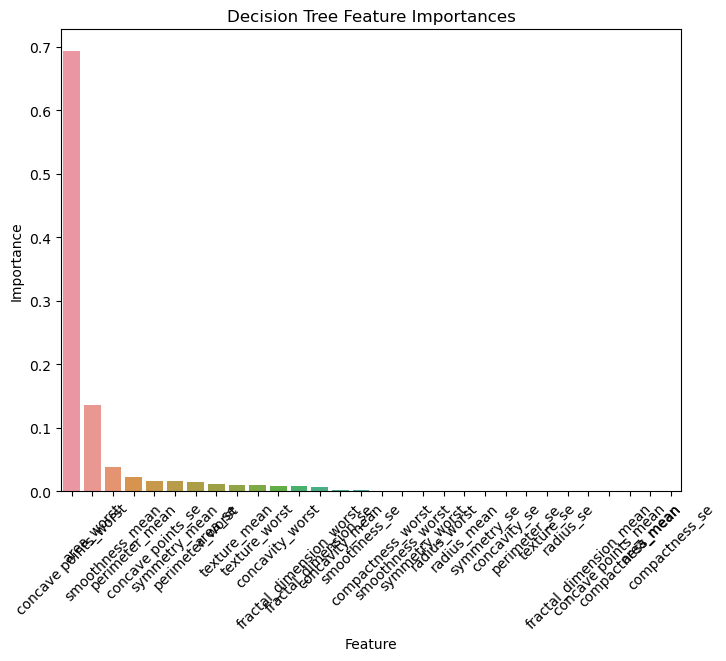

Cross-validation scores: [0.87912088 0.91208791 0.89010989 0.92307692 0.95604396]
Mean cross-validation score: 0.9121
--------------------------------------------------

Model: Logistic Regression
Accuracy: 0.9649
Confusion Matrix:
[[65  2]
 [ 2 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Cross-validation scores: [0.97802198 0.97802198 0.94505495 1.         0.98901099]
Mean cross-validation score: 0.9780
--------------------------------------------------

Model: Support Vector Machine
Accuracy: 0.9825
Confusion Matrix:
[[67  0]
 [ 2 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1 

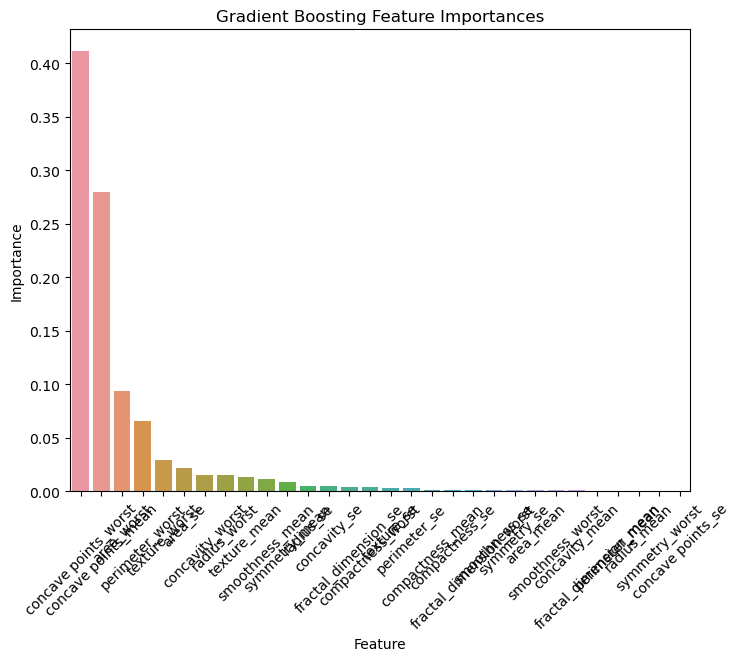

Cross-validation scores: [0.93406593 0.98901099 0.94505495 0.96703297 0.97802198]
Mean cross-validation score: 0.9626
--------------------------------------------------


In [20]:
# Evaluate each model
for model_name, model in models.items():
    evaluate_model(model, model_name)

In [21]:
# Import joblib for saving the model
import joblib

# Function to save the best model based on cross-validation mean score
def save_best_model(models, X_train, y_train, file_name='best_model.pkl'):
    best_model = None
    best_score = 0
    
    for model_name, model in models.items():
        pipeline = Pipeline(steps=[('scaler', scaler),
                                   ('model', model)])
        pipeline.fit(X_train, y_train)
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
        mean_cv_score = cv_scores.mean()

        print(f"{model_name} - Mean cross-validation score: {mean_cv_score:.4f}")

        if mean_cv_score > best_score:
            best_score = mean_cv_score
            best_model = pipeline
    
    # Save the best model
    joblib.dump(best_model, file_name)
    print(f"Best model saved as {file_name} with a mean cross-validation score of {best_score:.4f}")

# Save the best model
save_best_model(models, X_train, y_train)


Random Forest - Mean cross-validation score: 0.9560
Decision Tree - Mean cross-validation score: 0.9121
Logistic Regression - Mean cross-validation score: 0.9780
Support Vector Machine - Mean cross-validation score: 0.9758
K-Nearest Neighbors - Mean cross-validation score: 0.9648
Naive Bayes - Mean cross-validation score: 0.9473
Gradient Boosting - Mean cross-validation score: 0.9626
Best model saved as best_model.pkl with a mean cross-validation score of 0.9780
